In [151]:
import pandas as pd

df = pd.read_csv('./python_exercise_trades.csv')

# Sort the dataframe by trade date
df['Date']= pd.to_datetime(df['Trade Date'])
df = df.sort_values(by='Date', ascending=True)
df.reset_index(inplace=True)

In [152]:
df['trade_value'] = df['Trade Price'] * df['Trade Quantity']
df['long'] = df.apply(lambda col: col['Trade Quantity'] >= 0, axis=1)

# New df containing only long trades
longs = df[df['long']].copy()

# New df containing only short trades
shorts = df[~df['long']].copy() # Not long

# Column showing changing size of portfolio
df['portfolio_size'] = df['Trade Quantity'].cumsum()

df.head(30)

,index,Portfolio Code,Portfolio Name,Trade Date,Trade Identifier,Trade Quantity,Trade Price,Trade Currency,Date,trade_value,long,portfolio_size
0,3,ussmall1,US Small Cap,01/02/2012,3668,340,18.44,USD,2012-01-02,6269.60,True,340
1,0,ussmall1,US Small Cap,18/01/2012,3649,180,19.47,USD,2012-01-18,3504.60,True,520
2,1,ussmall1,US Small Cap,19/01/2012,3653,54,19.87,USD,2012-01-19,1072.98,True,574
3,2,ussmall1,US Small Cap,23/01/2012,3656,286,20.03,USD,2012-01-23,5728.58,True,860
4,5,ussmall1,US Small Cap,17/02/2012,3686,280,19.95,USD,2012-02-17,5586.00,True,1140
5,6,ussmall1,US Small Cap,28/02/2012,3695,290,19.03,USD,2012-02-28,5518.70,True,1430
6,7,ussmall1,US Small Cap,04/04/2012,3766,340,18.25,USD,2012-04-04,6205.00,True,1770
7,8,ussmall1,US Small Cap,17/04/2012,3791,150,16.78,USD,2012-04-17,2517.00,True,1920
8,9,ussmall1,US Small Cap,18/04/2012,3792,140,16.50,USD,2012-04-18,2310.00,True,2060
9,4,ussmall1,US Small Cap,06/02/2012,3671,60,18.30,USD,2012-06-02,1098.00,True,2120


In [153]:
# Lets look at longs trades
longs['cum_value'] = longs['trade_value'].cumsum()
longs['cum_qty'] = longs['Trade Quantity'].cumsum()
longs['abp'] = longs['cum_value'] / longs['cum_qty']

long_value = longs['trade_value'].sum()
long_qty = longs['Trade Quantity'].sum()
average_buy_price = long_value / long_qty
print(f'Total value of all longs: {long_value}')
print(f'Total qty of all longs: {long_qty}')
print(f'Episode average buy price: {average_buy_price}')

Total value of all longs: 149433.26
Total qty of all longs: 13090
Episode average buy price: 11.415833460656991


In [154]:
# Let looks at short trades
shorts['cum_value'] = shorts['trade_value'].cumsum()
shorts['cum_qty'] = shorts['Trade Quantity'].cumsum()
shorts['asp'] = shorts['cum_value'] / shorts['cum_qty']

short_value = shorts['trade_value'].sum()
short_qty = shorts['Trade Quantity'].sum()
average_sell_price = short_value / short_qty
print(f'Total value of all shorts: {short_value}')
print(f'Total qty of all shorts: {short_qty}')
print(f'Episode average sell price: {average_sell_price}')

Total value of all shorts: -189764.7
Total qty of all shorts: -13090
Episode average sell price: 14.496921313980138


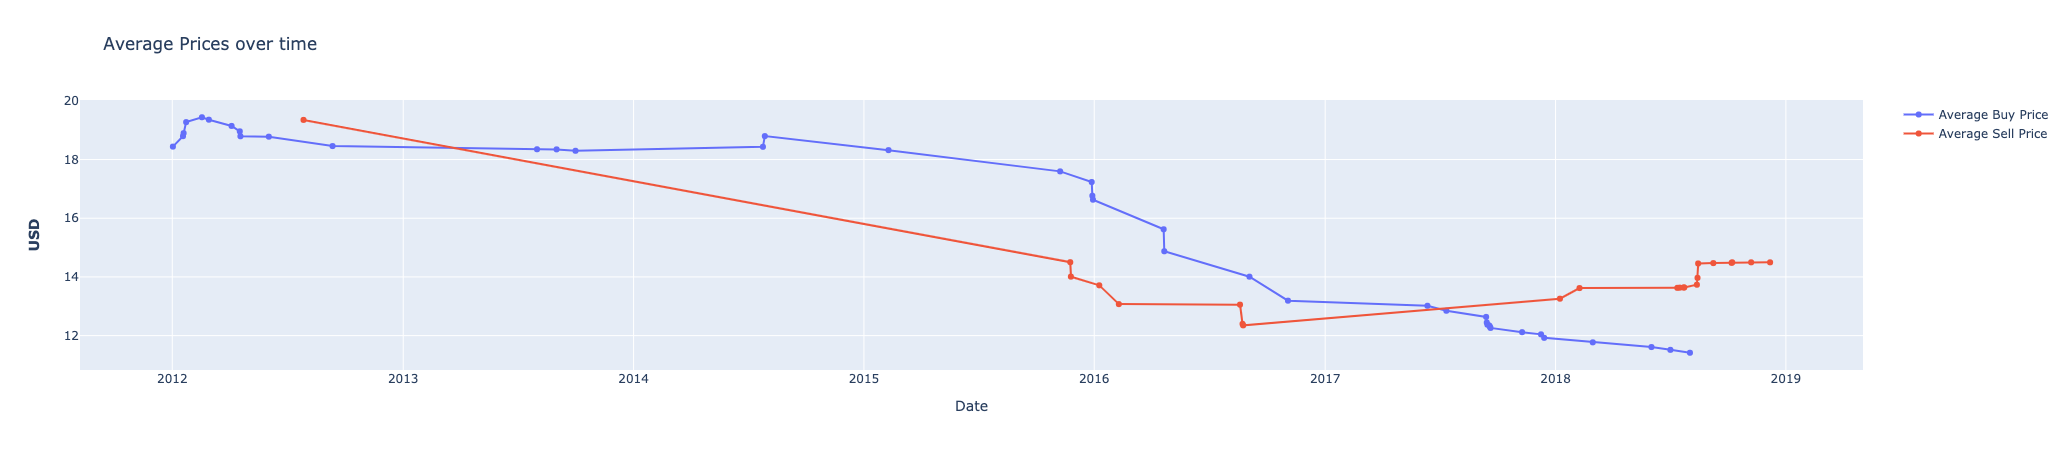

In [155]:
import plotly.graph_objects as go
fig = go.Figure()

# Average buy price of long trades and average sell price of short trades
fig.add_trace(go.Scatter(x=longs['Date'], y=longs['abp'], mode='lines+markers', name='Average Buy Price'))
fig.add_trace(go.Scatter(x=shorts['Date'], y=shorts['asp'], mode='lines+markers', name='Average Sell Price'))

# Add figure title
fig.update_layout(title_text="Average Prices over time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>USD</b>")

# Set x-axis title
fig.update_xaxes(title_text="Date")

fig.show()

In [156]:
# Calculate profit
# We only make profit when we close our short or long. Open trades don't have realized profit
# However for the purpose of this exerise I am going to assume that all trades are closed. Thus long_qty == short_qty
# Different calculations if episode still has open positions
assert abs(long_qty) == abs(short_qty)
profit = abs(short_value) - abs(long_value)
print(f'Profit: {profit}')

Profit: 40331.44


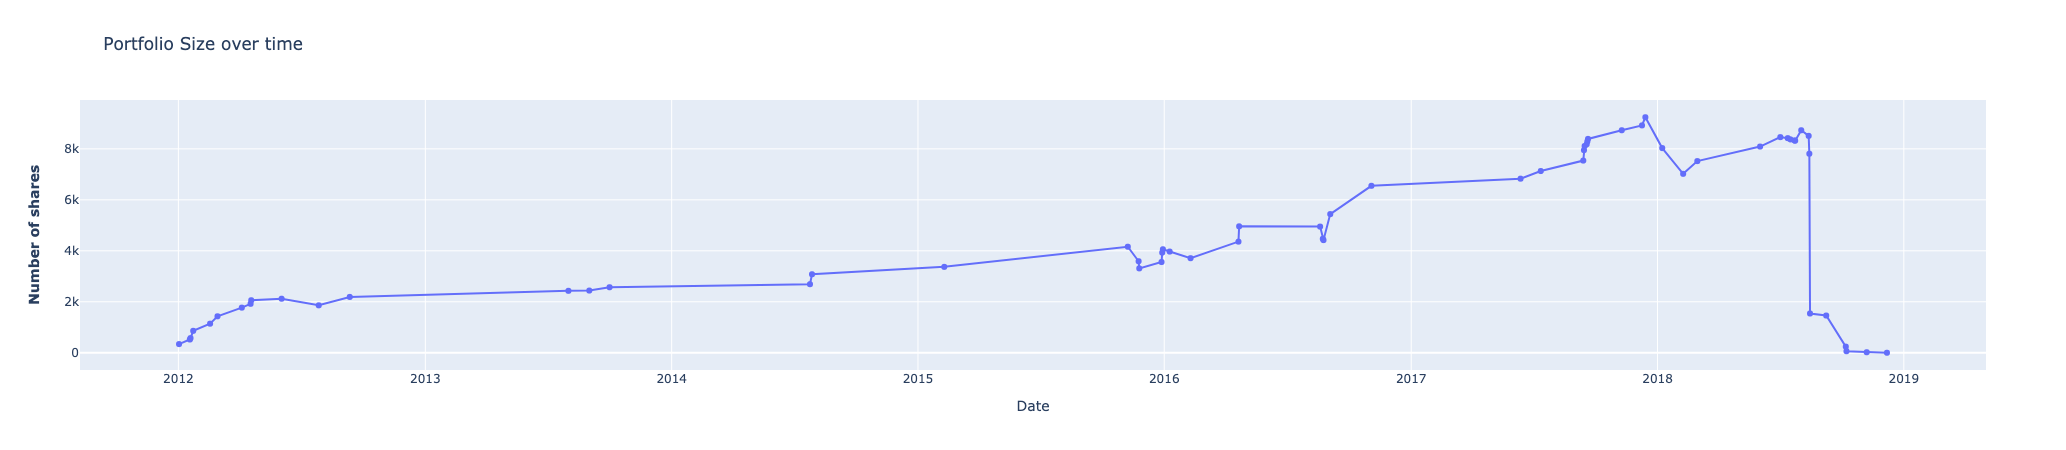

In [172]:
# This chart does not actually correctly show portfolio size over time because the lines slope between buys and sells, when they should remain level
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['portfolio_size'], mode='lines+markers', name='Portfolio Size'))

# Add figure title and axes labels
fig.update_layout(title_text="Portfolio Size over time")
fig.update_yaxes(title_text="<b>Number of shares</b>")
fig.update_xaxes(title_text="Date")
fig.show()

In [114]:
# To draw the above plot as a bar chart, with variable width bars, I need to know the how wide each bar should be
rows_len = len(df.index)
for index, row in df.iterrows():
    if index < rows_len - 1:
        # Determine how many days the portfolio value was at its particular level
        days = df.loc[index + 1, 'Date'] - row['Date']
        # print(days.days)

def get_days(index, current_date):
    if index < rows_len - 1:
        delta = df.loc[index + 1, 'Date'] - current_date
        return delta.days
    # Number of days for final value
    return 1
        

df['days'] = df.apply(lambda row: get_days(row.name, row['Date']), axis=1)
total_days = df['days'].sum()
df['bar_width'] = (df['days'] / total_days) * 20
df.head(30)

,index,Portfolio Code,Portfolio Name,Trade Date,Trade Identifier,Trade Quantity,Trade Price,Trade Currency,Date,trade_value,long,portfolio_size,days,bar_width
0,3,ussmall1,US Small Cap,01/02/2012,3668,340,18.44,USD,2012-01-02,6269.60,True,340,16,0.126382
1,0,ussmall1,US Small Cap,18/01/2012,3649,180,19.47,USD,2012-01-18,3504.60,True,520,1,0.007899
2,1,ussmall1,US Small Cap,19/01/2012,3653,54,19.87,USD,2012-01-19,1072.98,True,574,4,0.031596
3,2,ussmall1,US Small Cap,23/01/2012,3656,286,20.03,USD,2012-01-23,5728.58,True,860,25,0.197472
4,5,ussmall1,US Small Cap,17/02/2012,3686,280,19.95,USD,2012-02-17,5586.00,True,1140,11,0.086888
5,6,ussmall1,US Small Cap,28/02/2012,3695,290,19.03,USD,2012-02-28,5518.70,True,1430,36,0.284360
6,7,ussmall1,US Small Cap,04/04/2012,3766,340,18.25,USD,2012-04-04,6205.00,True,1770,13,0.102686
7,8,ussmall1,US Small Cap,17/04/2012,3791,150,16.78,USD,2012-04-17,2517.00,True,1920,1,0.007899
8,9,ussmall1,US Small Cap,18/04/2012,3792,140,16.50,USD,2012-04-18,2310.00,True,2060,45,0.355450
9,4,ussmall1,US Small Cap,06/02/2012,3671,60,18.30,USD,2012-06-02,1098.00,True,2120,55,0.434439


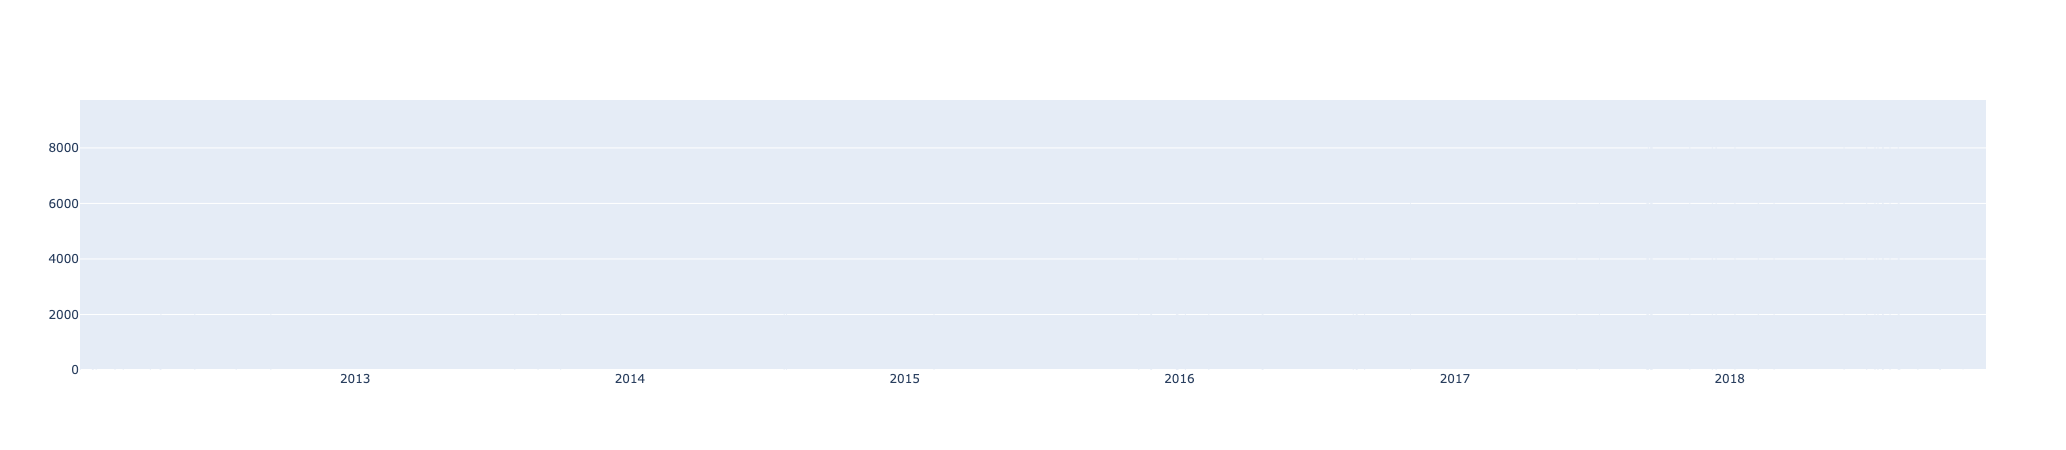

In [134]:
# Using plotly bar chart with custom bar widths does not work when the x-axis is dates. It works for numbers. Not gonna fix this will try something else
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=df['Date'], y=df['portfolio_size'], width=df['bar_width']
)])

fig.show()

In [166]:
# Were going to forward fill the df to generate the data. Its a bit hacky but it will work
# Create a new index containing each day from the entire episide
index = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# Make a copy of the data with only the columns we need
value_chart = df[['Date', 'portfolio_size']].copy()

# Create a date index and reindex using the new date range index we created above
value_chart.set_index('Date', inplace=True)
value_chart = value_chart.reindex(index=index)

# Forward fill down the index
value_chart.fillna(method='ffill', axis=0, inplace=True)

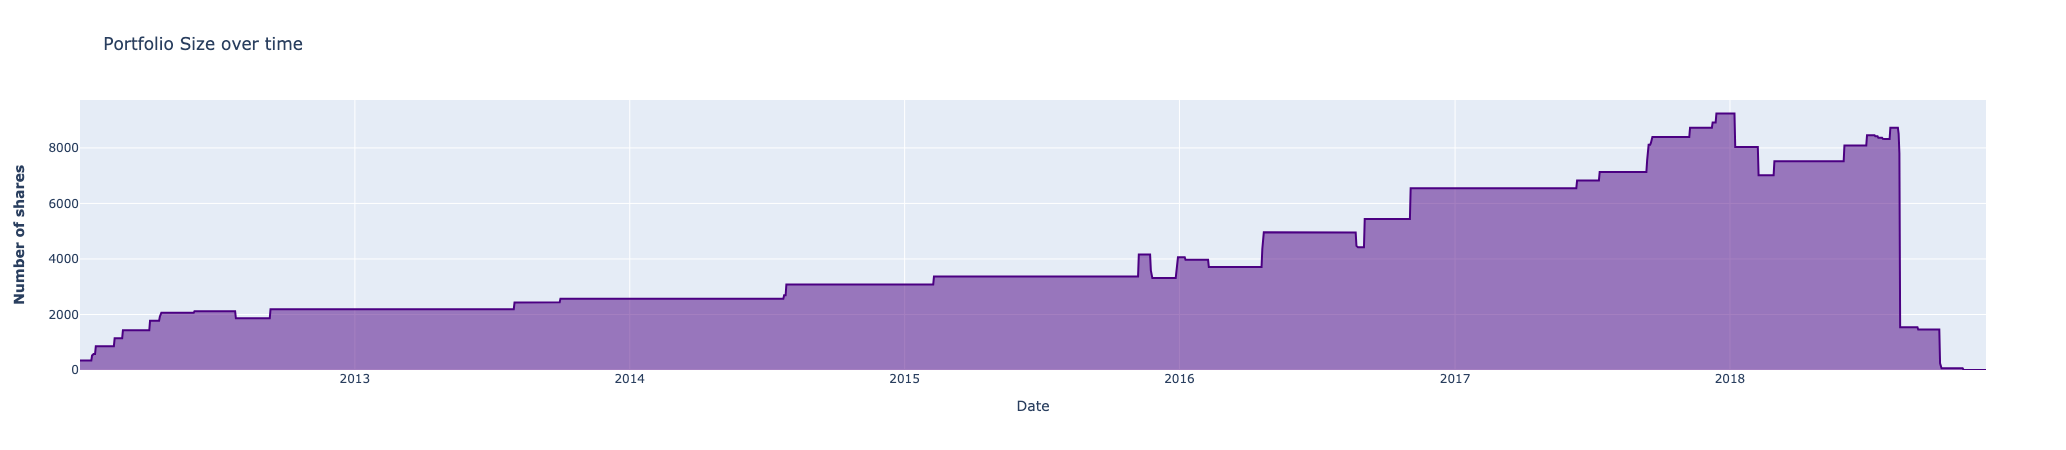

In [171]:
# Plot the correct portfolio size over time chart
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=value_chart.index, y=value_chart['portfolio_size'], mode='lines', fill='tozeroy', line_color='indigo', name='Portfolio Size'))

# Add figure title and axes labels
fig.update_layout(title_text="Portfolio Size over time")
fig.update_yaxes(title_text="<b>Number of shares</b>")
fig.update_xaxes(title_text="Date")
fig.show()